In [ ]:
#Load the libraries required for the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf

In [ ]:
#Load the libraries required for image handling/preprocessing
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image

In [ ]:
#Load the mobilenet model along with weights
mobile_net=tf.keras.applications.MobileNet()

In [ ]:
#load one sample image to predict its class
#resize the image to 224, 224 because by default mobilenet can handle the image of this size only
img=image.load_img('elephant.jpg',target_size=(224,224))

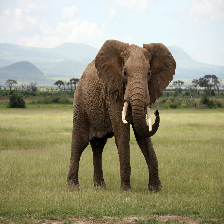

In [ ]:
img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
#convert the image into numpy array
img_ar=image.img_to_array(img)
img_ar.shape

(224, 224, 3)

In [ ]:
# Make the image 4 dimensional (1,224,224,3)
import numpy as np
img_ar1=np.expand_dims(img_ar,axis=0)

In [ ]:
#Mobilenet has been trained on the imagenet dataset after performing some preprocessing on these images
#It is necessary to do the same preprocessing on our image now prior to send this into mobilenet model

img_pre=tf.keras.applications.mobilenet.preprocess_input(img_ar1)

In [ ]:
img_pre.min() # the data range is now becoming between -1 to +1

-1.0

In [ ]:
pred=mobile_net.predict(img_pre) # Predict the class of the sample image

In [ ]:
pred.shape 
#The shape of the'pred' is 1000, because it giving us the probability value corresponds to 1000 classes


(1, 1000)

In [ ]:
pred[0].shape

(1000,)

In [ ]:
pred[0].max() # Maximum probabilty 

0.63173604

In [ ]:
pred[0].argmax() # Position of the class which have the maximum probability

101

In [ ]:
imagenet_utils.decode_predictions(pred)
#using decode_prediction function, we can get the class name and id informations for the top5 max probabity
# The sample image is predicted as tusker with 63 percent confidence

[[('n01871265', 'tusker', 0.63173604),
  ('n02504458', 'African_elephant', 0.3421364),
  ('n02504013', 'Indian_elephant', 0.025848566),
  ('n01704323', 'triceratops', 0.00014232086),
  ('n02437312', 'Arabian_camel', 3.3064614e-05)]]

In [ ]:
# We have already builded the flower prediction model in our previous session by 
  #developing CNN from scratch. Now we are going to build the flower prediction model through 
  # Transfer Learning approaches

In [ ]:
#Transfer Learning  through Feature Extraction 
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3)) 
# Loading the mobilenet weights for the input image size of 128,128
#mobilenet can support the following input size [128, 160, 192, 224]
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [ ]:
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False)
#include_top = False will remove the dense layers. In otherwords it will keep the model only till
# the convolution layers
#In the above summary report "global average pooling layer" is flattening the last convolution layer output.
# all these layers from global average pooling is not there if we do include_top=False

In [ ]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [ ]:
base_model.trainable=False # Freezing all the convolution layer weights

In [ ]:
base_model.summary() 
# As base model is now only having convolution layer and we have freezed all the convolution layer 
  # weights. So the trainable parameters becomes '0'


Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [ ]:
#Adding customized hidden layers and output layer with the mobilenet base model 
transfer_model=Sequential([base_model,
                            Flatten(),
                           Dropout(0.2),
                          Dense(512,activation='relu'),
                           Dropout(0.2),
                          Dense(64,activation='relu'),
                           Dropout(0.2),
                          Dense(5,activation='softmax')])
transfer_model.summary()
# After adding this , the trainable parameters are increasing, these are the parameters of hidden and output layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [ ]:
#Image augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,
                                rotation_range=45,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='reflect')

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
#Loading the flower dataset for training and testing
training_set=train_datagen.flow_from_directory('C:\\Users\\Senthil\\Desktop\\DEEP_LEARNING\\flower_photos\\Training',
                                              target_size=(128,128),
                                              batch_size=128,
                                              class_mode='categorical')

Found 2736 images belonging to 5 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('C:\\Users\\Senthil\\Desktop\\DEEP_LEARNING\\flower_photos\\Testing',
                                              target_size=(128,128),
                                              batch_size=128,
                                              class_mode='categorical')

Found 934 images belonging to 5 classes.


In [ ]:
transfer_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fit(Training) the model. In this step the weights for the top layers (hidden and output)
# are computed
transfer_model.fit(training_set,
              steps_per_epoch=2736/128,
              epochs=5,
              validation_data=test_set,
              validation_steps=934/128)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21.375 steps, validate for 7.296875 steps
Epoch 1/5
22/21 [==============================] - 127s 6s/step - loss: 2.7864 - accuracy: 0.5387 - val_loss: 0.9139 - val_accuracy: 0.7537
Epoch 2/5
22/21 [==============================] - 116s 5s/step - loss: 0.5179 - accuracy: 0.8205 - val_loss: 0.8362 - val_accuracy: 0.7666
Epoch 3/5
22/21 [==============================] - 113s 5s/step - loss: 0.4077 - accuracy: 0.8586 - val_loss: 0.8464 - val_accuracy: 0.7548
Epoch 4/5
22/21 [==============================] - 117s 5s/step - loss: 0.3892 - accuracy: 0.8596 - val_loss: 0.9547 - val_accuracy: 0.7355
Epoch 5/5
22/21 [==============================] - 112s 5s/step - loss: 0.3526 - accuracy: 0.8739 - val_loss: 1.0872 - val_accuracy: 0.7131


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
The test image class is : 3


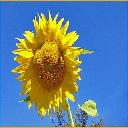

In [ ]:
# Testing the model with single image
test_img=image.load_img('C:\\Users\\Senthil\\Desktop\\DEEP_LEARNING\\flower_photos\\example\\4.jpg',
                       target_size=(128,128))
test_img1=image.img_to_array(test_img)
test_img1=test_img1/255.
test_img2=np.expand_dims(test_img1,axis=0)

ypred=transfer_model.predict(test_img2)
print(training_set.class_indices)

print('The test image class is :',ypred.argmax())
test_img

In [ ]:
# Transfer Learning with Fine tuning
base_model=tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False)

In [ ]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [ ]:
#Printing last few convolution layer name
for layer in base_model.layers[71:]:
    print(layer.name)

conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
conv_pw_12_relu
conv_dw_13
conv_dw_13_bn
conv_dw_13_relu
conv_pw_13
conv_pw_13_bn
conv_pw_13_relu


In [ ]:
# first 70 layers weights are Freezed. From 70 to last convolution layer weights are let to be unfreezed
for layer in base_model.layers[:70]:
    layer.trainable=False

In [ ]:
# for layer in base_model.layers[:70]:
#     print(layer.name)

In [ ]:
# for layer in base_model.layers:
#     print(layer.name,layer.trainable)

In [ ]:
# Adding the customized hidden and output layer with the partially freezed based model
transfer_fine_model=Sequential([base_model,
                              Flatten(),
                              Dropout(0.2),
                              Dense(512,activation='relu'),
                              Dropout(0.2),
                              Dense(64,activation='relu'),
                              Dropout(0.2),
                              Dense(5,activation='softmax')])

In [ ]:
from tensorflow.keras.optimizers import Adam
ada=Adam(learning_rate=0.0001) 
# use less learning factor when tuning the convolution layer weights of pretrained networks

In [ ]:
transfer_fine_model.compile(optimizer=ada,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fit(Training) the model. In this step the weights for the top layers (hidden and output)
# are computed along with that the weights of unfreezed convolution layers (from 70 to last conv layer)
# laso re-trained (tuned)
transfer_fine_model.fit(training_set,
              steps_per_epoch=2736/128,
              epochs=5,
              validation_data=test_set,
              validation_steps=934/128)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21.375 steps, validate for 7.296875 steps
Epoch 1/5
22/21 [==============================] - 139s 6s/step - loss: 1.4444 - accuracy: 0.5040 - val_loss: 1.0892 - val_accuracy: 0.6424
Epoch 2/5
22/21 [==============================] - 126s 6s/step - loss: 0.7295 - accuracy: 0.7328 - val_loss: 0.8860 - val_accuracy: 0.7120
Epoch 3/5
22/21 [==============================] - 126s 6s/step - loss: 0.5901 - accuracy: 0.7770 - val_loss: 0.8534 - val_accuracy: 0.7227
Epoch 4/5
22/21 [==============================] - 124s 6s/step - loss: 0.5287 - accuracy: 0.8099 - val_loss: 0.7307 - val_accuracy: 0.7719
Epoch 5/5
22/21 [==============================] - 126s 6s/step - loss: 0.4888 - accuracy: 0.8242 - val_loss: 0.8124 - val_accuracy: 0.7516


In [ ]:
# We can see the slight increase in the model performance afetr fine tuning the convolution layer